In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r'C:\Users\rodri\Desktop\Proyecto Reddit\Datos\final\datos_reddit_con_caracteristicas.csv')

df.head(10)

,id,titulo,autor,fecha,url,upvotes,comentarios,conteo_palabras,contiene_palabras_clave
0,1f4u7nx,spotify says apple discontinued the tech for s...,hectordj18,1.725022e+09,https://www.engadget.com/big-tech/spotify-says...,3374,375,14,1
1,1f50iq2,anandtech shuts down after years,atdoru,1.725038e+09,https://www.theverge.com/2024/8/30/24232171/an...,909,111,5,0
2,1f4jmgv,san francisco says good riddance as x prepares...,ardi62,1.724982e+09,https://www.siliconrepublic.com/business/elon-...,37548,1653,10,1
3,1f54qev,brazilian judge suspends x platform after it r...,icumcoffee,1.725048e+09,https://apnews.com/article/brazil-musk-x-suspe...,265,29,13,1
4,1f4q2bi,mpa says no more whacamole with pirate sites c...,ardi62,1.725006e+09,https://arstechnica.com/tech-policy/2024/08/mo...,2226,580,13,0
5,1f54sdu,brazilian judge suspends x platform after it r...,ok_scientist_8147,1.725048e+09,https://apnews.com/article/brazil-musk-x-suspe...,217,36,13,1
6,1f4i76j,starlinks local bank accounts are frozen as x ...,mawgu,1.724978e+09,https://www.engadget.com/social-media/starlink...,6748,391,15,1
7,1f50kmu,crowdstrike exec will testify to congress abou...,meenu_anon,1.725038e+09,https://www.theverge.com/2024/8/30/24232301/cr...,278,18,11,0
8,1f4vzmk,pavel durov took money from the same russian o...,kyzorath,1.725026e+09,https://balticsentinel.eu/8086226/interview-wi...,416,23,42,1
9,1f4p8xc,brain scientists finally discover the glue tha...,waozen,1.725003e+09,https://www.scientificamerican.com/article/bra...,1319,153,13,0


ID = Id de la publicación en Reddit.  
Titulo = Título de la publicación.  
Autor = Nombre de usuario del creador de la publicación.  
Fecha = Fecha y hora en que la publicación fue creada.  
URL = URL directa de la publicación en Reddit.  
Upvotes = Número de upvotes(votos positivos) que la publicación recibió.  
Comentarios = Número de comentarios que se hicieron en la publicación.  
conteo_palabras = Columna generada en el script 'ingenieria_caracteristicas.py' que cuenta la cantidad de palabras del título.  
contiene_palabras_clave = Columna generada en el script 'ingenieria_caracteristicas.py' que muestra si el título tiene una palabra clave o no relacionadas con el mundo de la Tecnología.  

In [11]:
df.describe()

,fecha,upvotes,comentarios,conteo_palabras,contiene_palabras_clave
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,1.724654e+09,1445.576000,143.280000,13.176000,0.478000
std,2.587507e+05,4506.140063,401.015152,6.049315,0.500016
min,1.724135e+09,0.000000,0.000000,3.000000,0.000000
25%,1.724427e+09,14.750000,4.000000,9.000000,0.000000
50%,1.724687e+09,95.500000,18.000000,12.000000,0.000000
75%,1.724880e+09,649.000000,91.250000,15.000000,1.000000
max,1.725049e+09,37557.000000,4388.000000,42.000000,1.000000


Vemos que tenemos una media de 1445 de votos positivos y una media de 143 comentarios. También podemos ver que la cantidad máxima de votos positivos en una publicación dentro de nuestro dataset es de 37557 y la cantidad máxima de comentarios que tiene una publicación es de 4388.

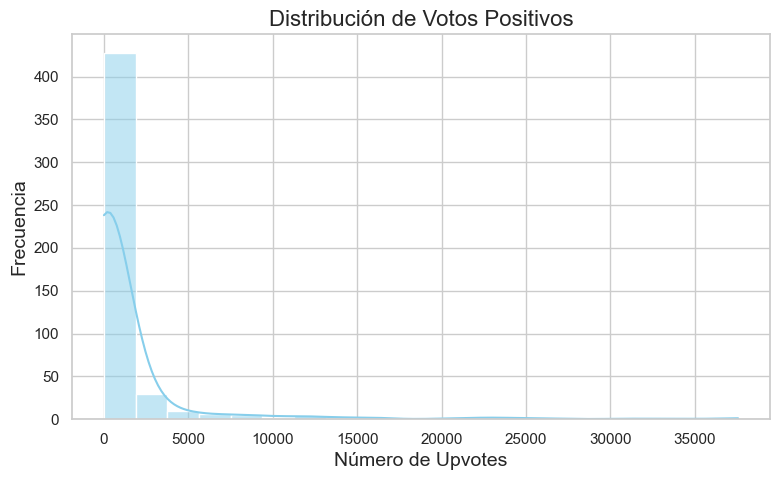

In [12]:
sns.set(style = 'whitegrid') # Configuramos el estilo de Seaborn.

plt.figure(figsize = (9, 5))
sns.histplot(df['upvotes'], bins = 20, kde = True, color = 'skyblue')

plt.title('Distribución de Votos Positivos', fontsize = 16)
plt.xlabel('Número de Upvotes', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)

plt.show()

Vemos que la mayoría de publicaciones tienen pocos upvotes, entre 0 a 2000 upvotes aproximadamente. Sin embargo, también vemos que algunas tienen un número significativamente mayor de upvotes.

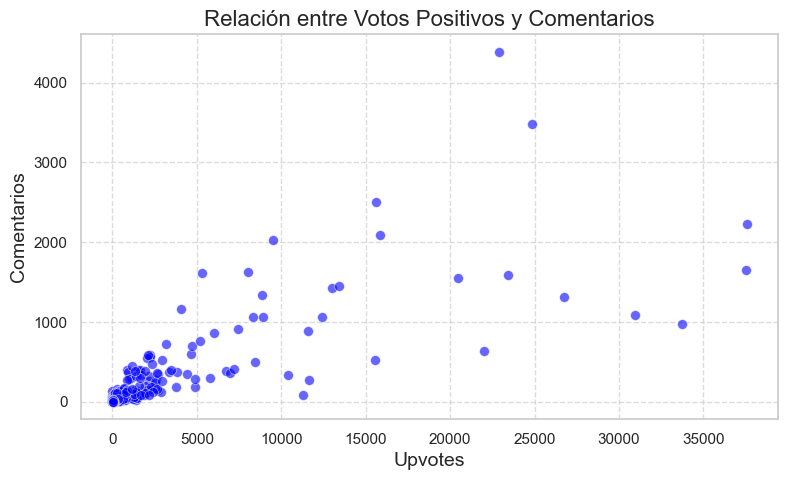

In [13]:
plt.figure(figsize = (9, 5))
plt.scatter(df['upvotes'], df['comentarios'], c = 'blue', s = 50, alpha = 0.6, edgecolors = 'w', linewidths = 0.5)

plt.title('Relación entre Votos Positivos y Comentarios', fontsize = 16)
plt.xlabel('Upvotes', fontsize = 14)
plt.ylabel('Comentarios', fontsize = 14)

plt.grid(True, linestyle = '--', alpha = 0.7)

plt.show()

Este gráfico nos muestra la relación que hay entre los votos positivos y los comentarios.

Vemos que a medida que aumentan los votos positivos también aumenta el número de comentarios, lo que es normal. También vemos que la mayoría de los datos se agrupan en la parte inferior izquierda del gráfico, lo que nos indica que la mayoría de las publicaciones dentro de nuestro dataset tienen relativamente pocos votos positivos y comentarios.

Este gráfico muestra que no todas las publicaciones siguen una relación directa entre votos positivos y comentarios aunque exista una tendencia positiva general. Hay variabilidad, indicando que algunos posts pueden ser muy votados pero no generan tanta discusión o viceversa.

Pero analizando el punto anterior, también se pueden tratar de outliers ya que, como vemos en el gráfico, hay publicaciones con poco más de 15.000 votos positivos que generaron más de 2000 comentarios y vemos publicaciones que tienen más de 30.000 votos positivos y rondan entre los 1000 y 2000 comentarios. Esto indica que podrían ser outliers o las publicaciones que tienen más de 30.000 votos no generaron tanta discusión en los comentarios como las publicaciones que tienen menos votos positivos.

Modificamos la columna fecha a formato fecha y hora legible.

In [14]:
df['fecha'] = pd.to_datetime(df['fecha'], unit = 's')

df

,id,titulo,autor,fecha,url,upvotes,comentarios,conteo_palabras,contiene_palabras_clave
0,1f4u7nx,spotify says apple discontinued the tech for s...,hectordj18,2024-08-30 12:38:43,https://www.engadget.com/big-tech/spotify-says...,3374,375,14,1
1,1f50iq2,anandtech shuts down after years,atdoru,2024-08-30 17:09:03,https://www.theverge.com/2024/8/30/24232171/an...,909,111,5,0
2,1f4jmgv,san francisco says good riddance as x prepares...,ardi62,2024-08-30 01:47:54,https://www.siliconrepublic.com/business/elon-...,37548,1653,10,1
3,1f54qev,brazilian judge suspends x platform after it r...,icumcoffee,2024-08-30 20:06:01,https://apnews.com/article/brazil-musk-x-suspe...,265,29,13,1
4,1f4q2bi,mpa says no more whacamole with pirate sites c...,ardi62,2024-08-30 08:22:11,https://arstechnica.com/tech-policy/2024/08/mo...,2226,580,13,0
...,...,...,...,...,...,...,...,...,...
495,1exr0dq,uks competition authority ends probes of apple...,patient_stable_5954,2024-08-21 14:27:14,https://techcrunch.com/2024/08/21/uks-competit...,10,1,20,1
496,1exsbyp,asus brings wifi to its triband rog gaming ro...,easy-speech7382,2024-08-21 15:19:31,https://www.theverge.com/2024/8/21/24225171/as...,10,22,9,1
497,1ewq2xz,hyundai will lock some incar features behind a...,cricketmad14,2024-08-20 08:10:21,https://www.motor1.com/news/718869/hyundai-in-...,3146,728,9,0
498,1exl5ek,a legal fight over floridas social media law i...,bobbylucero,2024-08-21 09:24:16,https://www.wmnf.org/legal-fight-over-florida-...,28,0,11,0


Por último, vemos la cantidad de 1 y 0 que hay en la columna 'contiene_palabras_clave' y que esa columna va a ser necesaria para los modelos preditivos que hay en este proyecto.

In [15]:
conteo_1 = df['contiene_palabras_clave'].sum()

conteo_0 = len(df) - conteo_1

print(f'Cantidad de 1: {conteo_1}')
print(f'Cantidad de 0: {conteo_0}')

Cantidad de 1: 239
Cantidad de 0: 261


Vemos que 261 de 500 registros no contienen una de las palabras de la lista dentro del archivo ingenieria_caracteristicas.py en la ruta: "Scripts/procesamiento_de_datos/ingenieria_caracteristicas.py"

In [19]:
df.to_csv(r'C:\Users\rodri\Desktop\Proyecto Reddit\Datos\final\datos_final.csv', index = False)